# Data Collection

In [1]:
!pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 31.1 MB/s eta 0:00:00


In [ ]:
# prompt: To convert PDF files to CSV files in Python, you can use the tabula-py library for extracting tables from PDFs and the pandas library for working with dataframes.

import tabula
import pandas as pd

# Load the PDF file
pdf_file = '/content/1.pdf'

# Extract tables from the PDF
tables = tabula.read_pdf(pdf_file, pages='all')

# Convert the tables to pandas dataframes
df = pd.concat(tables)

# Save the dataframe to a CSV file
df.to_csv('output.csv', index=False)


In [ ]:
import os
import pandas as pd
from tabula import read_pdf

def convert_pdf_to_csv(pdf_path, csv_path):
    # Use tabula to extract tables from the PDF
    tables = read_pdf(pdf_path, pages='all', multiple_tables=True)

    # Assuming you want to save all tables from the PDF into a single CSV file
    combined_df = pd.concat(tables, ignore_index=False)

    # Save the combined dataframe to a CSV file
    combined_df.to_csv(csv_path, index=False)
    print(f"Converted: {pdf_path} to {csv_path}")

def convert_all_pdfs_to_csv(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)

    # Iterate through each file
    for file in files:
        if file.endswith('.pdf'):
            # Construct the full paths for the PDF and CSV files
            pdf_path = os.path.join(folder_path, file)
            csv_name = os.path.splitext(file)[0] + '.csv'
            csv_path = os.path.join(folder_path, csv_name)

            # Convert the PDF to CSV
            convert_pdf_to_csv(pdf_path, csv_path)

# Specify the folder path containing the PDF files
folder_path = '/content/sample_data/PDF'

# Call the function to convert all PDF files to CSV in the folder
convert_all_pdfs_to_csv(folder_path)


In [ ]:
# prompt: To concatenate all CSV files into a single CSV file in Python

import pandas as pd
import os

# Specify the folder path containing the CSV files
folder_path = '/content/sample_data/CSV'

# List all CSV files in the folder
files = os.listdir(folder_path)

# Create an empty DataFrame
df = pd.DataFrame()

# Iterate through each CSV file
for file in files:
    # Read the CSV file into a DataFrame
    df_temp = pd.read_csv(os.path.join(folder_path, file))

    # Concatenate the DataFrame with the empty DataFrame
    df = pd.concat([df, df_temp], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
df.to_csv('output.csv', index=False)


In [5]:
import os
import pandas as pd

def concatenate_csv_files(folder_path, output_csv):
    # List all files in the folder
    files = os.listdir(folder_path)

    # Initialize an empty DataFrame to store the combined data
    combined_df = pd.DataFrame()

    # Iterate through each file
    for file in files:
        if file.endswith('.csv'):
            # Construct the full path for the CSV file
            csv_path = os.path.join(folder_path, file)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(csv_path)

            # Concatenate the DataFrame to the combined DataFrame
            combined_df = pd.concat([combined_df, df], ignore_index=True)

    # Save the combined DataFrame to a single CSV file
    combined_df.to_csv(output_csv, index=False)
    print(f"Combined all CSV files into: {output_csv}")

# Specify the folder path containing the CSV files
folder_path = '/content/drive/MyDrive/PDF'

# Specify the output CSV file
output_csv = 'output_combined.csv'

# Call the function to concatenate all CSV files into a single CSV file
concatenate_csv_files(folder_path, output_csv)


Combined all CSV files into: output_combined.csv


In [6]:
import os
import pandas as pd

def add_table_heading(csv_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_path)

    # Check if the required columns are already present
    required_columns = ["sr_no", "College_name", "cutoff"]
    missing_columns = set(required_columns) - set(df.columns)

    # Add missing columns with NaN values
    for column in missing_columns:
        df[column] = float('nan')

    # Save the updated DataFrame back to the CSV file
    df.to_csv(csv_path, index=False)

def concatenate_csv_files(folder_path, output_csv):
    # List all files in the folder
    files = os.listdir(folder_path)

    # Initialize an empty DataFrame to store the combined data
    combined_df = pd.DataFrame()

    # Iterate through each file
    for file in files:
        if file.endswith('.csv'):
            # Construct the full path for the CSV file
            csv_path = os.path.join(folder_path, file)

            # Add table heading/features to each CSV file
            add_table_heading(csv_path)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(csv_path)

            # Concatenate the DataFrame to the combined DataFrame
            combined_df = pd.concat([combined_df, df], ignore_index=True)

    # Save the combined DataFrame to a single CSV file
    combined_df.to_csv(output_csv, index=False)
    print(f"Combined all CSV files into: {output_csv}")

# Specify the folder path containing the CSV files
folder_path = '/content/drive/MyDrive/PDF'

# Specify the output CSV file
output_csv = 'output_combined.csv'

# Call the function to concatenate all CSV files into a single CSV file
concatenate_csv_files(folder_path, output_csv)


Combined all CSV files into: output_combined.csv


# **Chance of Admit Using linear Regression**


Import Student Data

In [7]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv("/content/output_combined.csv")
df.head(10)

,Sr No.,College Names,Cutoff,sr_no,College_name,cutoff
0,1,"College of Pharmacy ,Medha",29.45,NaN,NaN,NaN
1,2,"MVP Samaj college of pharmacy , Nashik",27.43,NaN,NaN,NaN
2,3,"Bharati Vidyapeeth college of pharmacy , Kolhapur",25.19,NaN,NaN,NaN
3,4,"Rajarambapu college of pharmacy, Kasegaon",24.17,NaN,NaN,NaN
4,5,"College of Pharmacy ,Vadgaon",23.87,NaN,NaN,NaN
5,6,"Poona college of Pharmacy , Pune",22.47,NaN,NaN,NaN
6,7,"JBSPM Institute college of pharmacy, Aurangabad",21.78,NaN,NaN,NaN
7,8,"Dr. R. G. Bhoyar Institute of Pharmacy , Beed",19.56,NaN,NaN,NaN
8,9,"College of Pharmacy , Paniv",16.78,NaN,NaN,NaN
9,10,"Yashwantrao chavan college of pharmacy, Ahmedn...",15.69,NaN,NaN,NaN


In [11]:
df.columns

Index(['Sr No.', 'College Names', 'Cutoff', 'sr_no', 'College_name', 'cutoff'], dtype='object')

**Chance of Admit** is target variable/feature/attribute

Except all are predictor

In [12]:
df.describe()

,Sr No.,Cutoff,sr_no,College_name,cutoff
count,2510.000000,2510.000000,0.0,0.0,0.0
mean,5.500000,52.830355,NaN,NaN,NaN
std,2.872854,30.959168,NaN,NaN,NaN
min,1.000000,15.690000,NaN,NaN,NaN
25%,3.000000,22.470000,NaN,NaN,NaN
50%,5.500000,29.450000,NaN,NaN,NaN
75%,8.000000,84.220000,NaN,NaN,NaN
max,10.000000,85.840000,NaN,NaN,NaN


In [13]:
df.dtypes

Sr No.             int64
College Names     object
Cutoff           float64
sr_no            float64
College_name     float64
cutoff           float64
dtype: object

Exploratory Data Analysis

In [14]:
# missing value
df.isnull()

,Sr No.,College Names,Cutoff,sr_no,College_name,cutoff
0,False,False,False,True,True,True
1,False,False,False,True,True,True
2,False,False,False,True,True,True
3,False,False,False,True,True,True
4,False,False,False,True,True,True
...,...,...,...,...,...,...
2505,False,False,False,True,True,True
2506,False,False,False,True,True,True
2507,False,False,False,True,True,True
2508,False,False,False,True,True,True


In [15]:
df.isnull().sum()

Sr No.              0
College Names       0
Cutoff              0
sr_no            2510
College_name     2510
cutoff           2510
dtype: int64

KeyError: "None of [Index(['Chance of Admit '], dtype='object')] are in the [columns]"

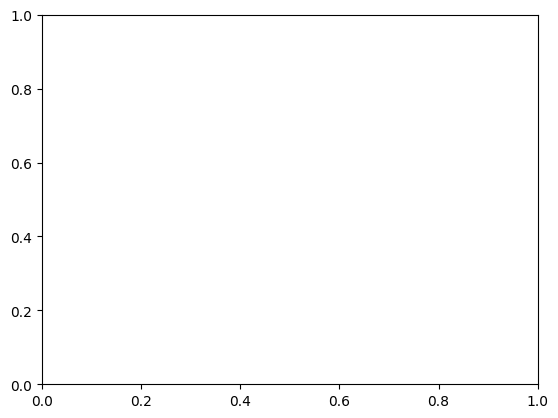

In [16]:
#identify remove outlier
# oulier visualization
df.boxplot(column = ["Chance of Admit "])

KeyError: "None of [Index(['GRE Score', 'TOEFL Score'], dtype='object')] are in the [columns]"

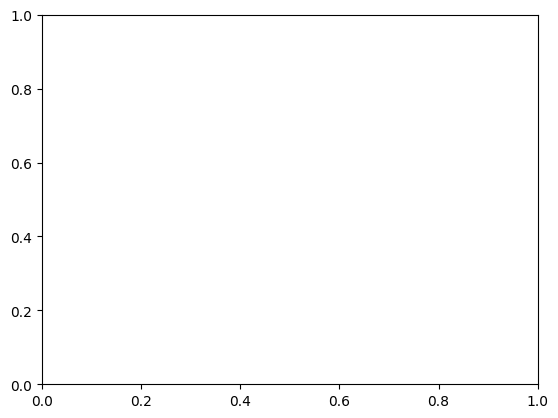

In [17]:
# oulier visualization
df.boxplot(column = ["GRE Score", "TOEFL Score"])

Building Model

In [ ]:
#separating independant and dependent variable
x = df.drop(["Chance of Admit "], axis=1)
y = df["Chance of Admit "]
x.shape, y.shape

In [ ]:
#split data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=56) # by default training data will be 80% and testing data 20%

Model selection and Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE

In [9]:
# creating instance of linear regression
lr = LinearRegression()

NameError: name 'LinearRegression' is not defined

In [ ]:
# Train the model
lr.fit(x_train, y_train)

Prediction From Model

In [ ]:
#predictiong over train set
train_prediction = lr.predict(x_train)
train_score = np.sqrt(MAE(train_prediction, y_train))
print(f"Traning Score: {train_score}")

In [ ]:
#predictiong over train set
test_prediction = lr.predict(x_test)
test_score = np.sqrt(MAE(test_prediction, y_test))
print(f"Testing Score: {test_score}")

Model Evaluation

In [ ]:
test = lr.score(x_test, y_test) * 100
train = lr.score(x_train, y_train) * 100


In [ ]:
print(test)
print(train)

# Merging Multiple Tables

In [ ]:
# prompt: concatenate more multiple csv file along with columns
import os
import pandas as pd

# Specify the folder path containing the CSV files
folder_path = '/content/csvs'

# List all CSV files in the folder
files = os.listdir(folder_path)

# Create an empty DataFrame
df = pd.DataFrame()

# Iterate through each CSV file
for file in files:
    # Read the CSV file into a DataFrame
    df_temp = pd.read_csv(os.path.join(folder_path, file))

    # Concatenate the DataFrame with the empty DataFrame
    df = pd.concat([df, df_temp], ignore_index=True)

print(df.head(20))
# Save the concatenated DataFrame to a new CSV file
df.to_csv('final_dataset.csv', index=True)


# Storing Data In SQLite

In [ ]:
# prompt: store a csv file in the SQLite database

import sqlite3
import pandas as pd

# Create a connection to the database
conn = sqlite3.connect('colleges_data.db')

# Create a cursor to execute SQL statements
cursor = conn.cursor()

# Create a table to store the data
cursor.execute('''CREATE TABLE Student_data (
    id INTEGER PRIMARY KEY,
    sr_num INTEGER,
    college_name TEXT,
    cut_off INTEGER
)''')

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/final_dataset.csv')

# Insert the data from the DataFrame into the table
cursor.executemany('INSERT INTO Student_data VALUES (?, ?, ?, ?)', df.values.tolist())

# Commit the changes to the database
conn.commit()

# Close the connection to the database
conn.close()


In [ ]:
# prompt: fetch the data from SQLite3 and display in the form of table

# Import the necessary libraries
import sqlite3
import pandas as pd

# Create a connection to the database
conn = sqlite3.connect('colleges_data.db')

# Create a cursor to execute SQL statements
cursor = conn.cursor()

# Fetch all the data from the table
cursor.execute('SELECT * FROM Student_data')

# Convert the results to a DataFrame
df = pd.DataFrame(cursor.fetchall())

# Print the DataFrame
print(df.head(20))

# Close the connection to the database
conn.close()


In [ ]:
# prompt: delete "sr_num" column from colleges_data.db

# Import the necessary libraries
import sqlite3

# Create a connection to the database
conn = sqlite3.connect('colleges_data.db')

# Create a cursor to execute SQL statements
cursor = conn.cursor()

# Delete the "sr_num" column from the table
cursor.execute('ALTER TABLE Student_data DROP COLUMN sr_num')

# Commit the changes to the database
conn.commit()

# Close the connection to the database
conn.close()


# **Final Code Training and Testing**


## Exploratory Data Analysis

In [18]:
# Import Libraries
import pandas as pd

#Step 2: import data
df = pd.read_csv('/content/admission_predict.csv')

In [19]:
# Step 3: Define X(features) and Y(Target)
y = df['Chance of Admit']
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]

# Step 4: train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state = 9598)

## Linear Regression Model

In [20]:
# Model selection
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()

# Train the model
# it is the step where the actually machine learning
model_LR.fit(x_train,y_train)
y_pred_LR = model_LR.predict(x_test)

# Calculate the Accuracy of the Model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error

error = mean_absolute_error(y_test,y_pred_LR)
percentageError = mean_absolute_percentage_error(y_test, y_pred_LR)
modelAccuracy = (1 - percentageError) * 100


print(f'Model Error: {error}')
print(f'Percentage Error: {percentageError}')
print(f'Model Accuracy: {modelAccuracy}')

Model Error: 0.041375892057603066
Percentage Error: 0.06789110722674732
Model Accuracy: 93.21088927732526


## Decision Tree Model

In [21]:
# model selection
from sklearn.tree import DecisionTreeRegressor
model_DTR = DecisionTreeRegressor()

# train the model
model_DTR.fit(x_train,y_train)

# Predict the result
y_pred_DTR = model_DTR.predict(x_test)

# calculate accuracy
error_DTR = mean_absolute_percentage_error(y_test,y_pred_DTR)
accuracy_DTR = (1 - error_DTR) * 100

print(f'Error: {error_DTR}')
print(f'Model Accuracy: {accuracy_DTR}')

Error: 0.1104918266491123
Model Accuracy: 88.95081733508877


## Random Forest Model

In [22]:
# model selection
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor()

# train the model
model_RFR.fit(x_train,y_train)

# Predict the result of model
y_pred4 = model_RFR.predict(x_test)

# Calculate error and accuracy
error_RFR = mean_absolute_percentage_error(y_test,y_pred4)
accuracy_RFR = (1-error_RFR)*100

print(f'Error: {error_RFR}')
print(f'Model Accuracy: {accuracy_RFR}')

Error: 0.0753371397358352
Model Accuracy: 92.46628602641648


## Prediction Comparision and Visulization

In [24]:
#create a table for given model and its accuracy

models = ["Linear Regression", "Decision Tree", "Random Forest"]
accuracies = [modelAccuracy, accuracy_DTR, accuracy_RFR]

table = pd.DataFrame({"Model": models, "Accuracy": accuracies})
table.head(3)

,Model,Accuracy
0,Linear Regression,93.210889
1,Decision Tree,88.950817
2,Random Forest,92.466286


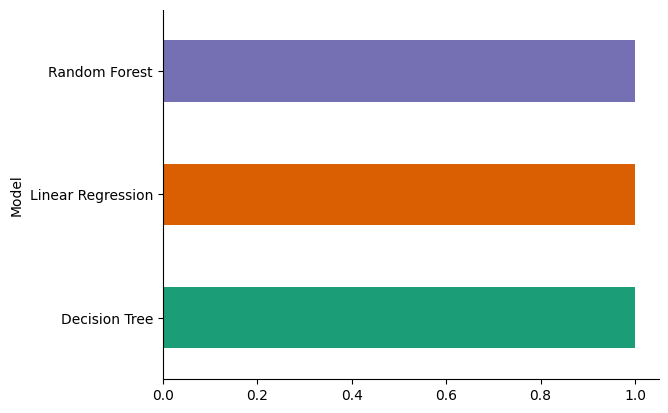

In [25]:
# @title Model

from matplotlib import pyplot as plt
import seaborn as sns
table.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

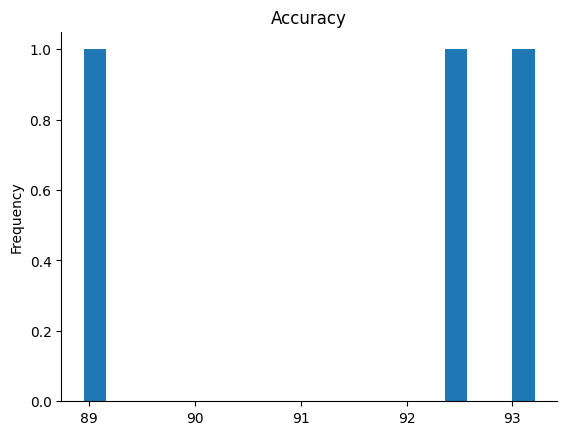

In [26]:
# @title Accuracy

from matplotlib import pyplot as plt
table['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Model', ylabel='Accuracy'>

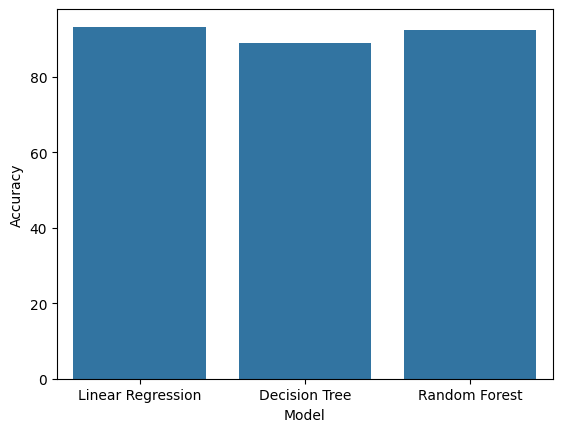

In [27]:
# @title Model Accuracy Comparison

sns.barplot(x='Model', y='Accuracy', data=table)

<Axes: xlabel='Model', ylabel='Accuracy'>

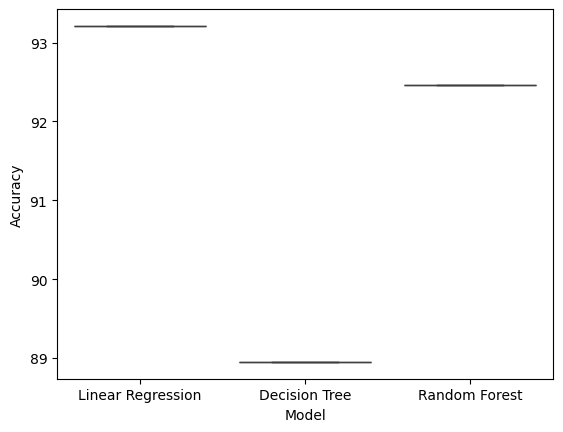

In [28]:
# @title Highest and Lowest Accuracy Models

sns.boxplot(x = 'Model', y = 'Accuracy', data = table)